In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

import gc
import myutil

In [2]:
class lgrWrapper():
    def __init__(self):
        return
    
    def init_model(self):
        self.clf = LogisticRegression(C = 0.0001)     
        return    
    def __repr__(self):
        return 'logReg'

    def train(self, trn_x, trn_y):
        self.clf.fit(trn_x, trn_y)

    def predict(self, x):
        result = self.clf.predict_proba(x)[:, 1]
        return result
    
    def get_coef(self):
        return self.clf.coef_.reshape(-1,1)

lgr = lgrWrapper()

In [3]:
data, test, y = myutil.get_train_test_label()

train datasset shape: (307511, 828)
test datasset shape: (48744, 828)


In [4]:
oof_preds, test_preds, importances, folds = myutil.cross_validation(data, test, y, lgr)

Fold  1 AUC : 0.636675
Fold  2 AUC : 0.629409
Fold  3 AUC : 0.653013
Fold  4 AUC : 0.624862
Fold  5 AUC : 0.636193
Full AUC score 0.636054


LogisticRegression


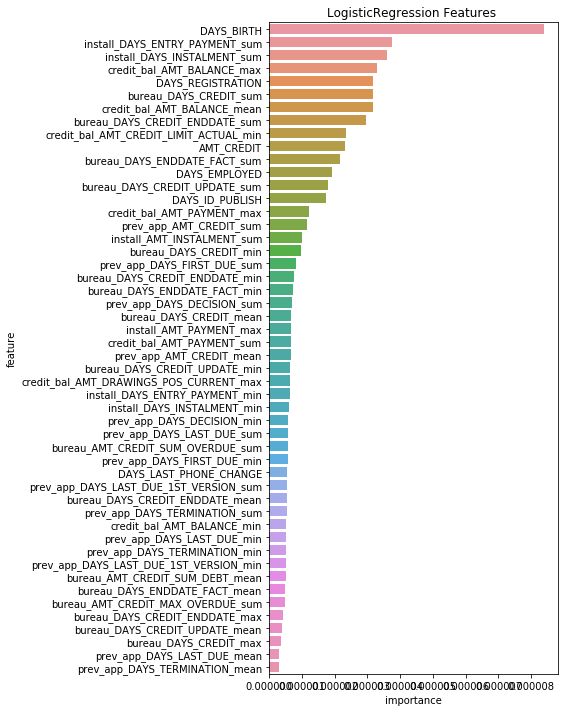

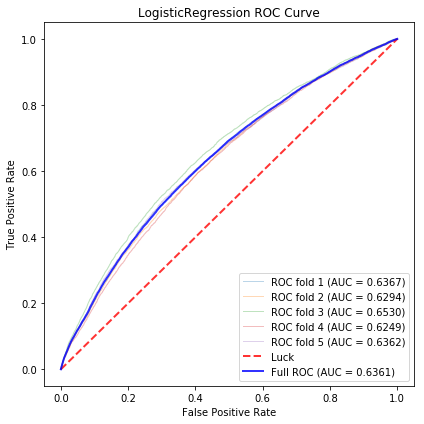

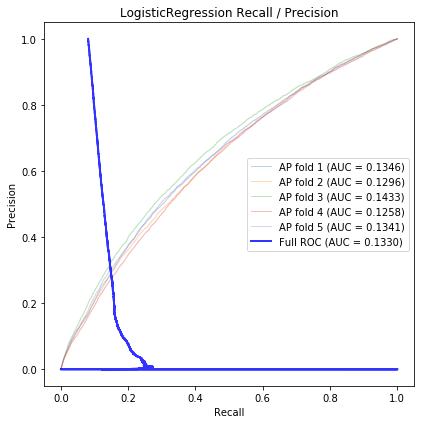

In [6]:
title = 'LogisticRegression'
myutil.report(test_preds, folds, importances, data, y, oof_preds, title, True)

In [7]:
oof_preds_us, test_preds_us, importances_us, folds_us = myutil.cross_validation_undersample(data, test, y, lgr)

total n fold : 11
Fold  1 AUC : 0.500650
Fold  2 AUC : 0.501956
Fold  3 AUC : 0.498584
Fold  4 AUC : 0.499130
Fold  5 AUC : 0.498889
Fold  6 AUC : 0.492892
Fold  7 AUC : 0.497530
Fold  8 AUC : 0.499305
Fold  9 AUC : 0.496247
Fold 10 AUC : 0.497752
Fold 11 AUC : 0.494081
Full AUC score 0.901703


LogisticRegression


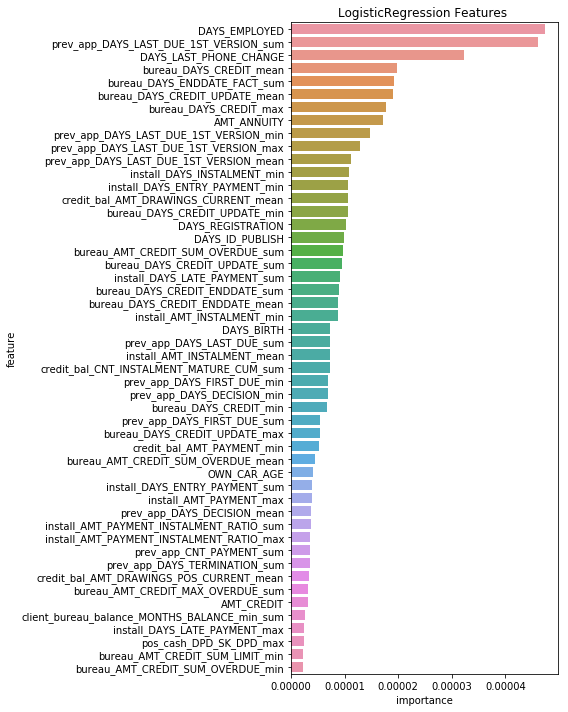

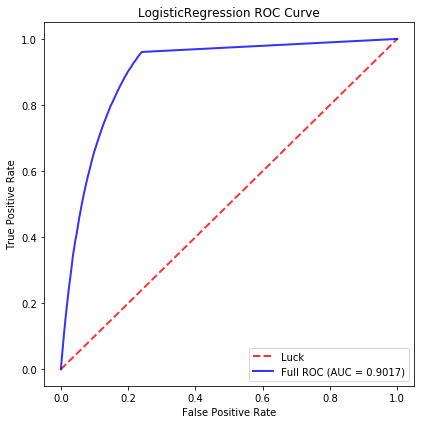

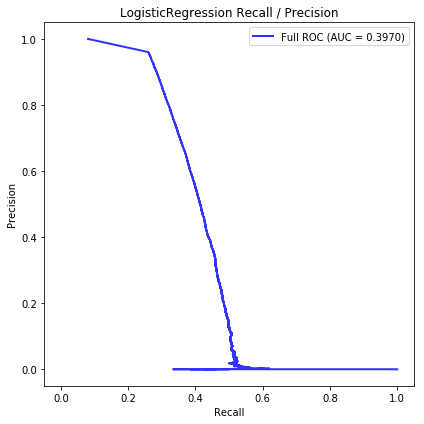

In [8]:
title = 'LogisticRegression_undersampling'
myutil.report(test_preds_us, folds_us, importances_us, data, y, oof_preds_us, title, False)